In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics
import scipy.stats as stats

plt.style.use('seaborn')
sns.set(font_scale=2)
pd.set_option('display.max_columns', 500)

In [30]:
def analysis(col):
    temp = train[col].value_counts()
    temp = temp[temp > temp.iloc[0]//100].index
    temp_df = train[train[col].isin(temp)]
    #temp_df = temp_df.sample(1000)
    p = temp_df.HasDetections.mean()
    q = 1-p
    random_data = pd.Series(np.random.choice([1,0], len(temp_df),p=[p,q]), index = temp_df.index).rename('HasDetections')
    temp_df['random_data'] = random_data
    
    #temp_df.groupby(col).HasDetections.mean().plot(kind = 'bar', figsize=(20,10))
    temp_df.groupby(col)[['HasDetections', 'random_data']].mean().plot(kind = 'bar', figsize=(20,10))
    plt.title('Percent of Has detections by {}'.format(col))
    
    display(pd.DataFrame({'train_data': temp_df.groupby(col).HasDetections.mean(),
                         'random_data': temp_df.groupby(col).random_data.mean()}))
    return stats.chi2_contingency([temp_df.groupby(col).HasDetections.mean(),
                temp_df.groupby(col).random_data.mean()])

                        

In [22]:
COLS = [
    'HasDetections',
    'Platform',
    'OsBuild'
]

In [5]:
train = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS)

In [6]:
train.head()

,Platform,OsBuild,HasDetections
0,windows10,17134,0
1,windows10,17134,0
2,windows10,17134,0
3,windows10,17134,1
4,windows10,17134,1


,train_data,random_data
Platform,,
windows10,0.500032,0.500166
windows7,0.486511,0.497034
windows8,0.506720,0.500571


(0.000143345214104048,
 0.9999283299613679,
 2,
 array([[0.49934477, 0.49103096, 0.50288596],
        [0.50085236, 0.49251344, 0.50440423]]))

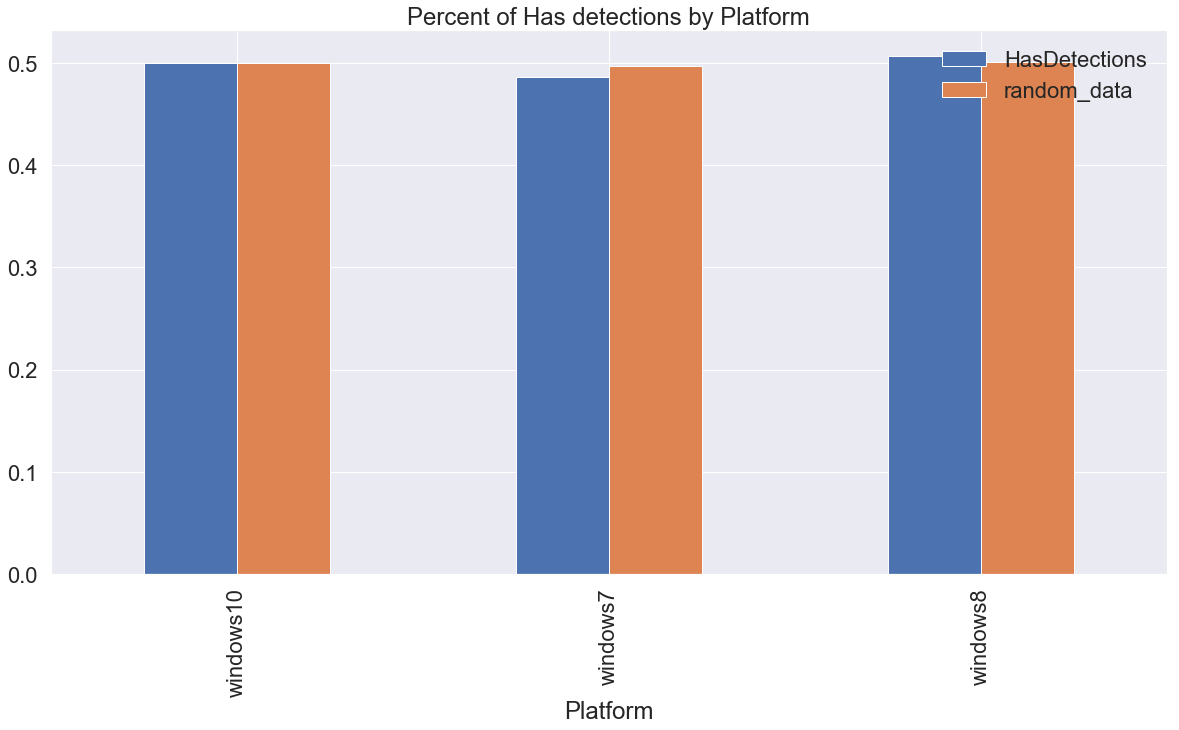

In [31]:
analysis(COLS[1])

In [24]:
# virius and platform is not likely revelent

,train_data,random_data
OsBuild,,
7601,0.486432,0.499871
9600,0.506720,0.499707
10240,0.486584,0.499012
10586,0.465831,0.498287
14393,0.462269,0.500926
15063,0.478875,0.498909
16299,0.492128,0.499598
17134,0.520727,0.499721


(0.0027536920300464864,
 0.9999999999916825,
 7,
 array([[0.48712639, 0.49706513, 0.48677686, 0.47616965, 0.47571335,
         0.48291917, 0.48980439, 0.50399055],
        [0.49917674, 0.50936134, 0.49881856, 0.48794895, 0.48748137,
         0.49486544, 0.50192099, 0.51645807]]))

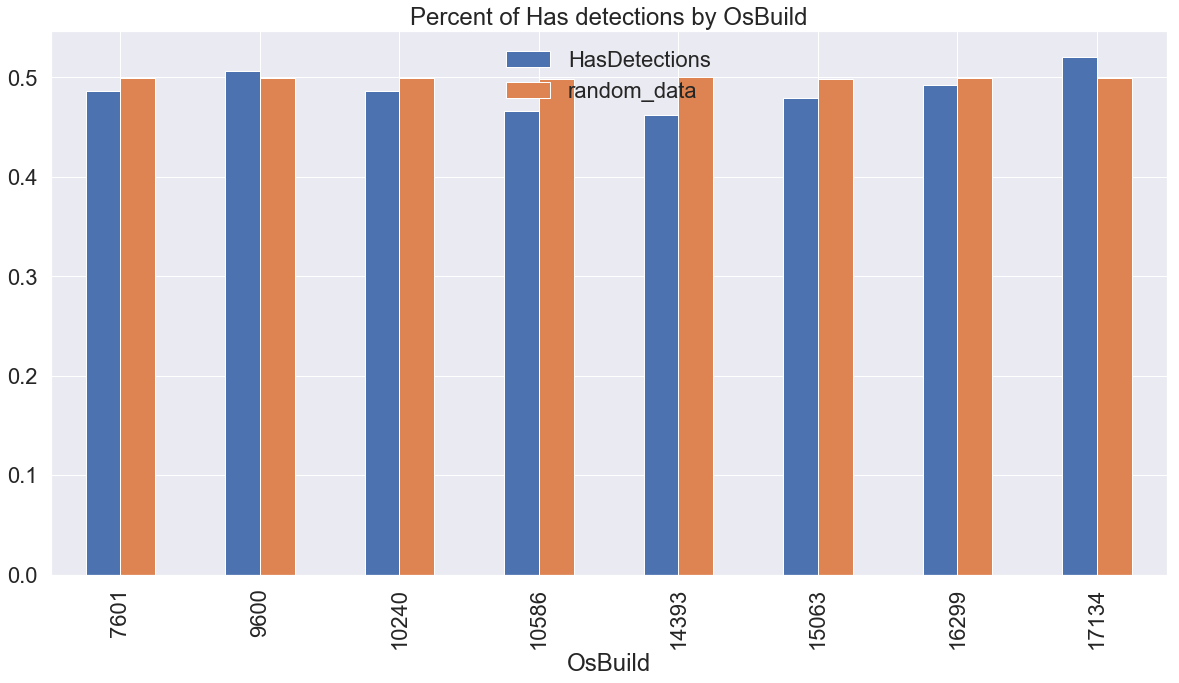

In [32]:
analysis(COLS[2])